# CNN Architectures #

A file with implementations of different existing CNN architectures for practice. All implementations only seek to demonstrate each architecture, they are not full demonstrations on their data sets.

In [3]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader

## LeNet ##

[LeNet](https://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf), specifically LeNet-5, was introduced in 1998 for classifying handwritten characters (the MNIST dataset). The structure is as follows:

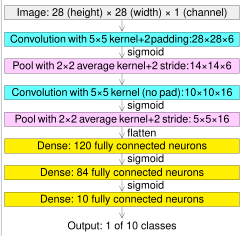

In [2]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=(2,2), stride=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5)),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=(2,2), stride=2),
            nn.Flatten(),
            nn.Linear(in_features=400, out_features=120),
            nn.Sigmoid(),
            nn.Linear(in_features=120, out_features=84),
            nn.Sigmoid(),
            nn.Linear(in_features=84, out_feature=10),
            nn.Softmax(dim=1)
        )
        
    def forward(self, X):
        output = self.model(X)
        
        return output
    

## AlexNet ##

[AlexNet](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) was created for the ImageNet Large Scale Visual Recognition Challenge in 2012 and became state of the art for several image datasets. The creation of AlexNet showed that a deeper model can lead to higher performance. The architecture layout is as follows:

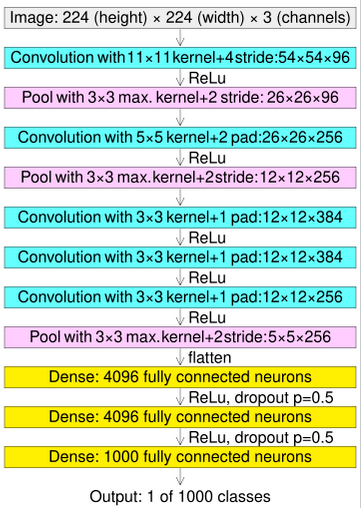

The final layer is put through the Softmax function. Additionally, the network uses Local Response Normalization in the first and second convolutional layers. In the cases where there is normalization occurs, it comes before the non-linearity and max-pooling. Normalization is found to help with generalization in this model. 

In [4]:
class AlexNet(nn.Module):
    def __init__():
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=(11,11), stride=4),
            nn.LocalResponseNorm(size=96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=2),
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=(5,5), padding=2),
            nn.LocalResponseNorm(size=256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=2),
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=2),
            nn.Flatten(),
            nn.Linear(in_features=6400, out_features=4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=1000),
            nn.Softmax(dim=1)
        )
    
    def forward(self, X):
        output = self.model(X)
        
        return output

def train_alexnet(train_data):
    
    # get the data
    train_batches = DataLoader(train_data, batch_size=128)
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # set up training
    model = AlexNet()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), momentum=0.9, weight_decay=0.0005)
    
    model.train()
    
    for e in range(90):
        for X,Y in train_batches:
            X = X.to(device)
            Y = Y.to(device)
            
            # forward pass
            pred = model(X)
            loss = loss_fn(pred, Y)
            
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    

## VGG ##

[VGG](https://arxiv.org/pdf/1409.1556), published in 2015, is an architecture that improved upon AlexNet. Tehre are two versions, the VGG-16 which is composed of 16 layers and VGG-19 which is composed of 19. The VGG-16 architecture is as follows:

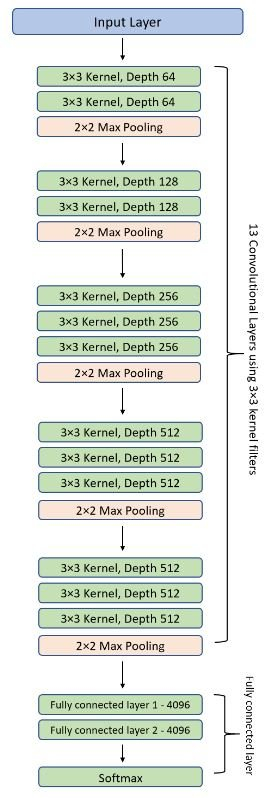

The above configuration is known as ConvNet Configuration D in the paper. All convolutional kernels have a stride length of 1 and padding of 1. And all layers are followed by an ReLU activation function. The max pooling layers have a stride of 2. The first two fully connected layers have dropout with probability 0.5. The final layer outputs 1000 features for classification before the softmax function.

In [7]:
class VGG16(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            
            nn.Flatten(),
            nn.Linear(in_features=25088, out_features=4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Lienar(in_features=4096, out_features=1000),
            nn.Softmax(dim=1)
        )
    
    def forward(self, X):
        output = model(X)
        
        return output

# mini batch gradient descent with momentum 0.9
# training regularized by weight decay

def train_vgg16(train_data):
    # get training data
    train_batches = DataLoader(train_data, batch_size=256)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model = VGG16()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.005)
    
    model.train()
    
    for e in range(74):
        for X,Y in train_batches:
            X = X.to(device)
            Y = Y.to(device)
            
            # forward pass
            pred = model(X)
            loss = loss_fn(pred, Y)
            
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


## Residual Network (ResNet) ##

[ResNet](https://arxiv.org/pdf/1512.03385) was introduced to allow for deeper networks, but avoid the vanishing and exploding gradient problem. The core of the ResNet is the residual block, which features a skip connection. A residual block is shown below:

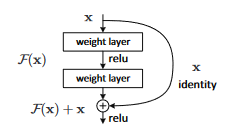

The ResNet architecture is 34 layers with residual blocks consisting of two convolutional layers with kernel size 3x3, followed by a final fully connected layer with Softmax function to output the 1,000 classes.

The entire ResNet, compared to VGG-19 and a 34 layer without residual blocks is shown here:

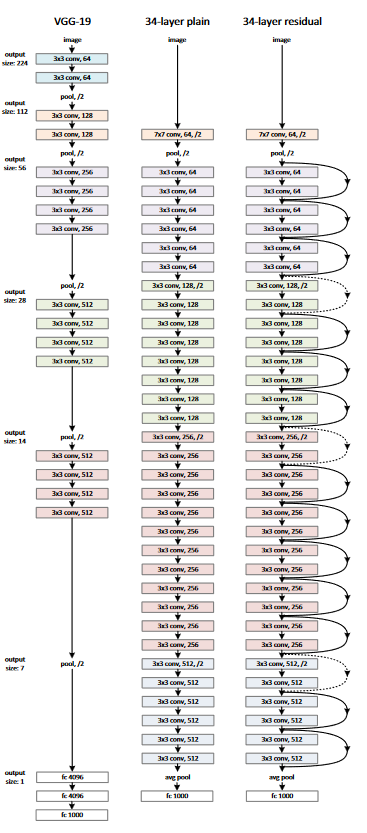

Additionally it should be noted that batch normalization is performed after all convolutional layers, before the activation function. In some cases, the input and output are not of the same dimensions (output has increased dimensions). To deal with this, the input performs 1x1 convolutions with stride 2 to perform the identity mapping.

In [4]:
# the basic residual block as described above, with 2 convolutional layers, then the input is added to 
# output before final acitvation function
class ResidualBlock(nn.Module):
    # if there's a stride length change, it always affects first convolution layer, otherwise stride is 1
    def __init__(self, inchan, outchan, first_stride=1):
        super(self).__init__()
        self.residual = nn.Sequential(
            nn.Conv2d(in_channels=inchan, out_channels=outchan, filter_size=(3,3), stride=first_stride),
            nn.BatchNorm2d(outchan),
            nn.ReLU(),
            nn.Conv2d(in_channels=outchan, out_channels=out_chan, filter_size=(3,3), stride=1),
            nn.BatchNorm2d(outchan)
        )
        # if inchan < outchan, downsample using 1x1 convolutions
        self.downsample = None
        if inchan != outchan:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels = inchan, out_channels=outchan, kernel_size=(1,1), stride=2),
                nn.BatchNorm2d(outchan)
            )
        
        self.final_relu = nn.ReLU()
    
    def forward(self, X):
        output = self.residual(X)
        
        if self.downsample is not None:
            identity = self.downsample(X)
        else:
            identity = X
        
        output += identity
        output = self.final_relu(output)
        
        return output

# we adopt batch norm right after each convolution and before activation
# full residual network
class ResNet(nn.Module):
    def __init__(self):
        super(self).__init__()
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(7,7), stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=2),
            
            nn.ResidualBlock(64, 64),
            nn.ResidualBlock(64, 64),
            nn.ResidualBlock(64, 64),
            
            nn.ResidualBlock(64, 128, first_stride=2),
            nn.ResidualBlock(128, 128),
            nn.ResidualBlock(128, 128),
            nn.ResidualBlock(128, 128),
            
            nn.ResidualBlock(128, 256, first_stride=2),
            nn.ResidualBlock(256, 256),
            nn.ResidualBlock(256, 256),
            nn.ResidualBlock(256, 256),
            nn.ResidualBlock(256, 256),
            nn.ResidualBlock(256, 256),
            
            nn.ResidualBlock(256, 512, first_stride=2),
            nn.ResidualBlock(512, 512),
            nn.ResidualBlock(512, 512),
            
            nn.AdaptiveAvgPool2d((1,1)),
            # based on diagram, think output size is 7x7x512
            nn.Linear(in_features=25088, out_features=1000)
        )
    
    def forward(self, X):
        output = self.network(X)
        
        return output
        

def train(data):
    # get training data
    train_batches = DataLoader(data, batch_size=256)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # prep training
    model = ResNet()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = otpim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
    
    # train model
    model.train()
    
    for e in (60*10e4):
        for X,Y in train_batches:
            X = X.to(device)
            Y = Y.to(device)
            
            # forward pass
            pred = model(X)
            loss = loss_fn(pred, Y)
            
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()